# Momentum Based Gradient

    It will calculate exponentially weighted average of the gradient. It will eleminate the oscillation

It will generate momentum speed by calculating exponentially weighted average

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

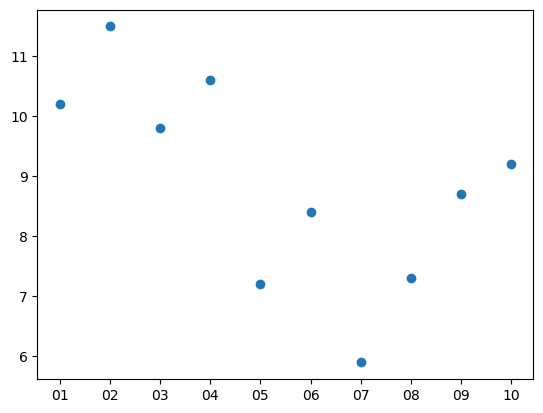

In [2]:

data = {
    "Date": ["01", "02", "03", "04", "05","06", "07", "08", "09", "10"],
    "Temperature (Celsius)": [10.2, 11.5, 9.8, 10.6, 7.2, 8.4, 5.9, 7.3, 8.7, 9.2]
}

df = pd.DataFrame(data)

# Extract x (date) and y (temperature) as lists
x = np.array(df["Date"].tolist())
y = df["Temperature (Celsius)"].tolist()
plt.scatter(x,y)
plt.show()

# Exponential weighted average
It is a moving average based on time

Eg: 

v0 = 0 #it is 0 because it is 1st

v1 = 0.9 * v0 + 0.1 * current_value #it value is calculated based on 90% of previous points and  10% of current point

v2 = 0.9 * v1 + 0.1 * current_value
..... continue

General formula is
$v_t =\beta v_{t-1} + (1 - \beta)current_t$ 

if $\beta$ is increase $(1 - \beta)$ will decrease $\beta$ will control history value ans $(1 - \beta)$ will control current value

Here $\beta$ value from 0 to 1

$$
v_0 = 0\\
$$

$$
v_1 = \beta v_0 + (1-\beta)v_1 \\
    = (1 - \beta) v_1
$$

$$
v_2 = \beta v_1 + (1-\beta)v_2 \\
    = \beta((1-\beta)v_1) + (1-\beta)v_2\\
    = \beta(1-\beta)v_1 + (1 - \beta) v_2
$$

$$
v_3 = \beta v_2 + (1-\beta)v_3\\
    = \beta(\beta(1-\beta)v_1 + (1-\beta)v_2) + (1-\beta) v_3\\
    = \beta^{2}(1-\beta)v_1 + \beta^{1}(1-\beta)v_2 + (1-\beta) v_3\\
$$

$$
v_4 = \beta v_3 + (1-\beta)v_4\\
    = \beta(\beta^{2}(1-\beta)v_1 + \beta^{1}(1-\beta)v_2 + (1-\beta) v_3) + (1-\beta) v_4\\
    = \beta^{3}(1-\beta)v_1 + \beta^{2}(1-\beta)v_2 + \beta^{1}(1-\beta)v_3 + (1-\beta) v_4\\
$$

Now Generalize the formula

$$
v_4 = (1-\beta)(\beta^3 v_1 + \beta^2 v_2 + \beta v_3 + v_4)
$$

if $\beta = 0.9$
$$
With\ power\ 0 \\
\beta^0 = 0.9^0 = 1 \\

$$

$$
With\ power\ 1 \\
\beta^1 = 0.9 ^ 1 = 0.9 \\
$$

$$
With\ power\ 2 \\
\beta^2 = 0.9^2 = 0.81\\
$$

$$
With\ power\ 3 \\
\beta^3 = 0.9^3 =  0.729\\
$$

When power increases value decreases

$$
Now\ relate\ with\ v_4\\
v_4\ is\ the\ current\ value\\
v_4 = (1-\beta)(\beta^3 v_1 + \beta^2 v_2 + \beta v_3 + v_4) = (1-\beta)(v_4 + \beta v_3 + \beta^2 v_2 + \beta^3 v_1 )\\
v_4\ value\ has\ no\ change\\
v_3\ value\ will\ be\ reduced\ compared\ to\  v_4\\
v_2\ value\ will\ be\ reduced\ compared\ to\  v_3\\
likewise....\\
$$

$$
v_t = (1-\beta) (v_t + \beta^1 v_{t-1} + \beta^2 v_{t-2}+ \beta^3 v_{t-3}+ ... +\beta^n v_{t-n})\\
v_t = (1-\beta) * \sum_{k=1}^{n} \beta^{n-k} \theta _{k}
$$
if $v_5$ is current value means $v_4$ value  will be reduced in $v_5$ cycle. With this what we found is current value has more weight age than previous one when time increases older value faded out, So it is called as Weighted moving exponential average


In [3]:
def expoWeightAvg(beta,values):
    oldEwa = 0
    finalValue = []
    for i,value in enumerate(values):
        if i == 0:
            oldEwa = value
            finalValue.append(value)
        else:
            ewa = ((beta) * oldEwa) + ((1 - beta) * (value)) 
            oldEwa = ewa
            finalValue.append(ewa)
       
    return finalValue

In [4]:
def graph(x,y,y1):
    plt.scatter(x,y)
    plt.plot(x,y1)
    plt.show()

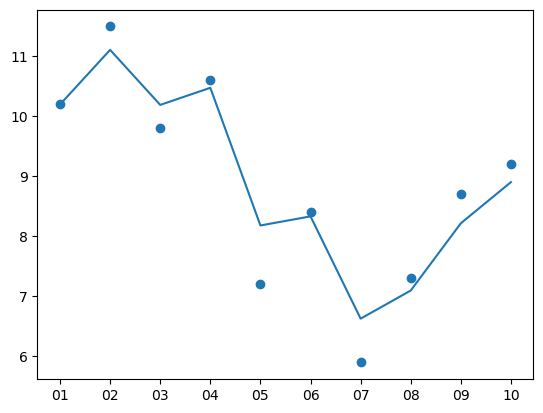

In [5]:
y1 = expoWeightAvg(0.3,y)
graph(x,y,y1)

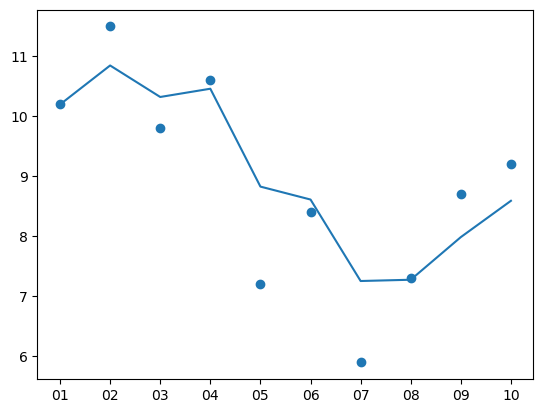

In [6]:
y1 = expoWeightAvg(0.5,y)
graph(x,y,y1)

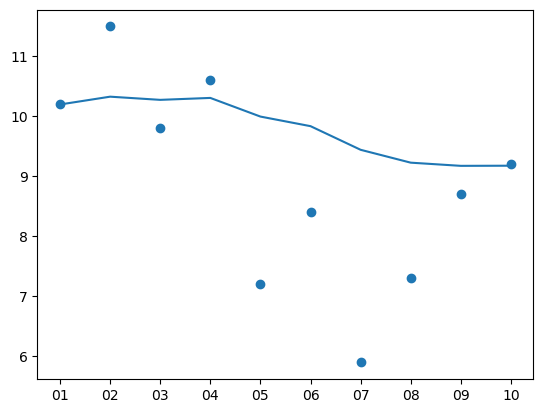

In [7]:
y1 = expoWeightAvg(0.9,y)
graph(x,y,y1)

## Beta value increase more smoother

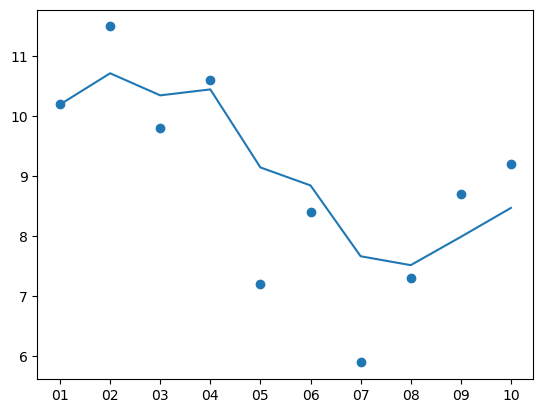

In [8]:
y1 = expoWeightAvg(0.6,y)
graph(x,y,y1)

In [9]:
def fun(x):
    return x ** 2

def der_fun(x):
    return 2 * x + 0.00001

def grad_dec(x, lr):
    return x - (lr * der_fun(x))
        

In [10]:
x = range(-100,101)
y = [fun(i) for i in x]

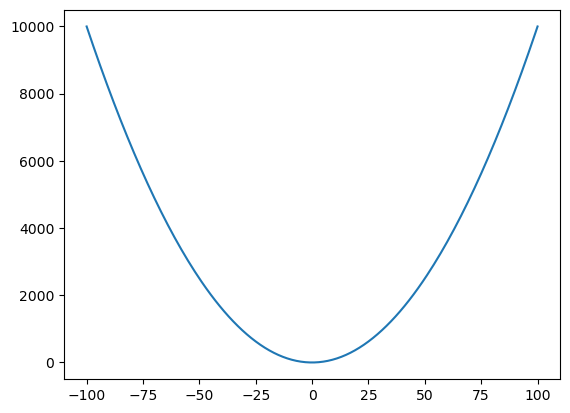

In [11]:
plt.plot(x,y)
plt.show()

88.1999999
86.435999802
84.70727970595999
83.01313401184079
81.35287123160397
79.72581370697189
78.13129733283246
76.56867128617581
75.0372977604523
73.53655170524326


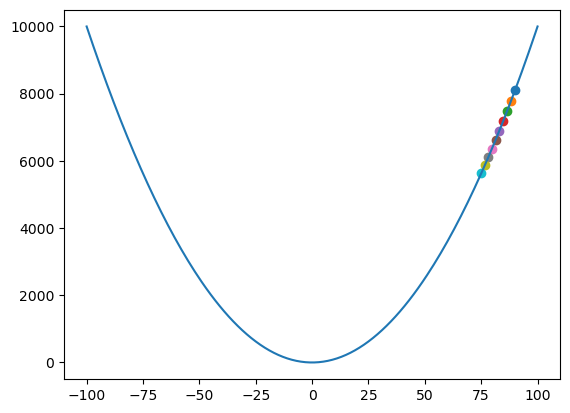

In [12]:
# Without momentum
x1 = 90
y1 = fun(x1)

plt.plot(x,y)
for i in range(10):
    plt.scatter(x1,y1)
    x1 = grad_dec(x1,0.01)
    y1 = fun(x1)
    print(x1)
plt.show()

35.2799999
34.9977598608
34.7177777419136
34.44003547997829
34.164515156138464
33.89119899488936
33.62006936293024
33.3511087680268
33.084299857882584
32.81962541901952


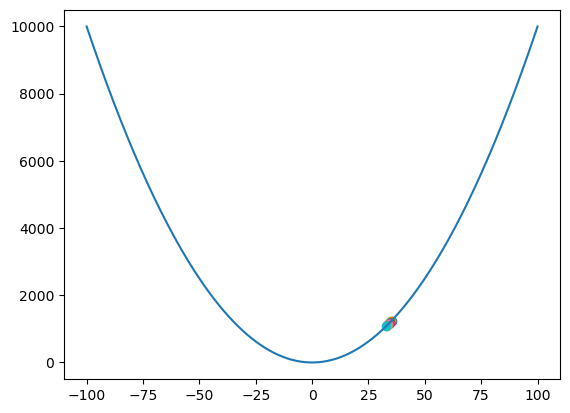

In [13]:
#with moemntum
x1 = 90
ewa = 0
beta = 0.6
y1 = fun(x1)

plt.plot(x,y)
for i in range(10):
    ewa = (beta * ewa )+ ((1-beta) * x1) # x1 is reduced by 1 - beta percent
    x1 = grad_dec(ewa,0.01) # here the problem is x1 is already reduced by some percent based on beta value and it is now even reduced based on learning rate. So it is slow
    y1 = fun(x1)
    plt.scatter(x1,y1)
    print(x1)
plt.show()

88.1999999
84.81599971199999
80.07407944856
74.2048695224928
67.43848309858247
59.999965555091514
52.10530035484783
43.957995567531555
35.74626124759628
27.640775034702607
19.793021842404247
12.334183432487638
5.3745450949129365
-0.9966204108025538
-6.710737057730444


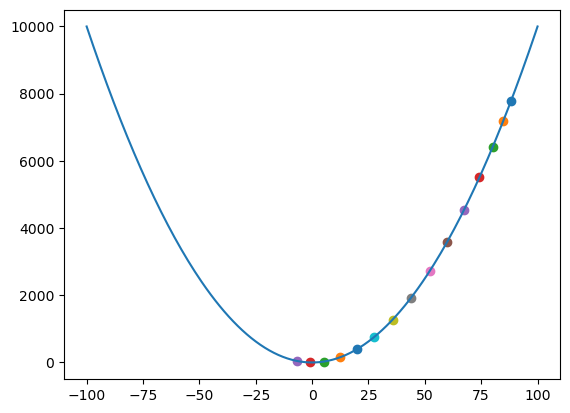

In [14]:
#with moemntum and modified gradient
x1 = 90
ewa = 0
beta = 0.9
y1 = fun(x1)

plt.plot(x,y)
for i in range(15):
    ewa = (beta * ewa ) + (0.01 * (2 * x1 + 0.00001))
    x1 -= ewa
    y1 = fun(x1)
    plt.scatter(x1,y1)
    print(x1)
plt.show()

88.1999999
84.81599971199999
80.07407944856
74.2048695224928
67.43848309858247
59.999965555091514
52.10530035484783
43.957995567531555
35.74626124759628
27.640775034702607
19.793021842404247
12.334183432487638
5.3745450949129365
-0.9966204108025538
-6.710737057730444


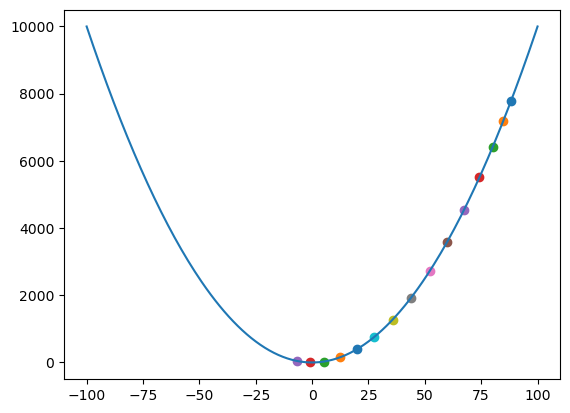

In [16]:
#with moemntum and modified gradient
x1 = 90
ewa = 0
beta = 0.9
y1 = fun(x1)

plt.plot(x,y)
for i in range(15):
    ewa = (beta * ewa ) - (0.01 * (2 * x1 + 0.00001)) ## see the intermediate sign
    x1 += ewa ## see the intermediate sign
    y1 = fun(x1)
    plt.scatter(x1,y1)
    print(x1)
plt.show()

## Modified version of gradient for momentum is converge (downhill) faster

Now we know that $\beta$ value is between 0 to 1, to get the No.of.Samples based on the $\beta$ values

$\frac{1}{1-\beta} = No\ of\ Samples$

Eg: 1
if $\beta = 0.9$ 

$\frac{1}{1-0.9} = \frac{1}{0.1} = 10$ Based on previous 10 values. The current value is calculated 

Eg: 2
if $\beta = 0.98$ 

$\frac{1}{1-0.98} = \frac{1}{0.02} = 50$ Based on previous 50 values. The current value is calculated 


## vice versa
$\frac{1}{1-\beta} = 50$

$\frac{1}{-\beta + 1} = 50$

$1 = -50\beta + 50$

Flip the equation

$-50\beta + 50 = 1$

$-50\beta = 1 - 50$

$\beta = \frac{-49}{-50}$

$\beta = \frac{49}{50} = 0.98$

## Cons
It can over shoot the value and cause osscilation see that last value is not in 0 actually it is overshooted to -values based on the gained momentum, based on the negative gradient (-ve gradient and gradient descent it self has -ve) and negative momentum again it will comes to +ve side it will osscilate like pendulam. It will converge faster but it will osscilate in last

# Nestrov momentum

It will look ahead before jump